## **Workshop Biologia Sistêmica do Câncer**
#### Universidade Federal do Rio Grande do Norte (UFRN)
#### Instituto Metrópole Digital (IMD)
#### Centro Multiusuário de Bioinformática (BioME)


---


# **Seleção de atributos**

**Autor: Prof. Dr. Tetsu Sakamoto (IMD/UFRN)**


---


Muitas vezes quando lidamos com problemas de classificação utilizando métodos supervisionados de aprendizado de máquina, temos em mãos dados que possuem **muitos atributos** (ou variáveis) para cada amostra. Exemplo disso são os dados de **expressão gênica**, onde para cada amostra é possível obter dados de expressão de centenas ou milhares de genes distintos. Neste caso, cada um dos genes pode servir como um atributo a ser considerado na construção de um modelo de aprendizado de máquina. 

No entanto, o uso de muitos atributos pode incorrer a algumas desvantagens, como:

* A exigência de um tempo de processamento maior na etapa de treinamento do modelo;
* Redução da acurácia do modelo devido a presença de ruídos;

Por isso, antes de iniciar o treinamento do modelo propriamente dito, é interessante realizar passos de limpeza e de filtragem dos seus dados. A filtragem dos dados pode ser feita de forma a **selecionar** aqueles atributos que sejam importantes na construção do modelo. 

A **seleção de atributos** nos permite responder outros tipos de questões sobre os nossos dados. Caso estejamos lidando com dados de expressão de pacientes sadios e doentes, podemos determinar quais genes são importantes ou fazerm diferença na precisão e na acurácia de um modelo de aprendizado de máquina.

Este material abordará como podemos realizar na prática a **seleção de atributos** de um dado de expressão de câncer utilizando o Python.

## Carregando as bibliotecas necessárias


In [0]:
import pandas as pd
import numpy as np


## Sobre os dados

Os dados que serão utilizados nesta aula são dados de expressão gênica de linfomas proveniente do artigo de [Shipp et al. (2002)](https://www.nature.com/articles/nm0102-68). Neste trabalho, foi verificado se é possível identificar dois tipos de linfoma (Linfoma difuso de células B grandes - DLBCL; e linfoma folicular - FL) utilizando dados de expressão gênica e métodos de aprendizado de máquina. Para isso, foram obtidos dados de expressão de 6.817 genes de 58 pacientes com DLBCL e 19 com FL.

Nas células abaixo, carregaremos os dados de expressão gênica e das anotações de cada paciente. 

In [0]:
# Carregar os dados de expressão (Shipp et al., 2002)
file = pd.read_csv("http://pubs.broadinstitute.org/mpr/projects/Lymphoma/lymphoma_8_lbc_fscc2_rn.res", # Endereço onde os dados estão hospedados;
                   sep="\t",                                                                           # Indicar que as colunas estão separadas por tabulação;
                   skiprows=[1,2])                                                                     # Pular as linhas 1 e 2 (primeira linha = 0);

file # visualizar os dados

In [0]:
# Dados de classificação das amostras (variável resposta)
cls = pd.read_csv("http://pubs.broadinstitute.org/mpr/projects/Lymphoma/lymphoma_8_lbc_fscc2.cls", sep=" ", skiprows=[0,1], header=None)
cls = cls.transpose()[0]
cls

## Estruturando os dados

As células abaixo farão alguns procedimentos que estruturarão os dados para torná-los aplicáveis nas funções que geram os modelos de aprendizagem de máquina. 

In [0]:
## Retirada das colunas Unnamed: X
file = file.filter(regex='^[^U]')
file

In [0]:
## Extraindo os dados numéricos
data = file.loc[:,"DLBC1":"FSCC1"] # Seleciona as colunas entre DLBC1 e FSCC1
data



In [0]:
# Transpor os dados para que os atributos fiquem nas colunas e as amostras nas linhas.
data = data.transpose()            # Transpõe a tabela
data

In [0]:
# adicionando índices a variável resposta
cls.index = data.index
cls

In [0]:
# Pegando o nome/código de cada gene (feature)
feature_names = file.Description
feature_names

## Gerando um modelo de aprendizagem de máquina

Agora que temos os nossos dados estruturados, podemos aplicá-los a um método de aprendizado de máquina supervisionado.

Nesta prática, utilizaremos o **SVM** (*Support Vector Machine*) para gerar o classificador e o *cross-validation* para verificar a acurácia do classificador. Para isso, vamos carregar as bibliotecas necessárias e aplicar os nossos dados.

In [0]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(gamma="scale", C=10)
scores = cross_val_score(clf, data, cls, cv=5)  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Utilizando todos os atributos, nós obtemos uma acurácia de: _ _ _ _ _ _ _ _ _ _ _ _ _

O que será que acontece com a acurácia do nosso modelo se retirarmos alguns atributos? Vamos verificar isso nas próximas células.

## Método de filtro (Filter method)

Nesta abordagem, utiliza-se métricas estatísticas para ranquear os atributos para ajudar na sua seleção. O ranqueamento desses atributos normalmente é baseado em uma **análise de correlação** dos dados de um atributo com a variável resposta.

Vamos calcular nas próximas células a correlação de cada uma das nossas colunas com a variável resposta. Acompanhe:


In [0]:
# Calculando a correlação de cada atributo (genes) com a variável resposta:
cor = data.apply(lambda x: x.corr(cls))
cor

Na célula anterior criamos uma variável *cor*, onde cada linha representa um gene e os valores correspondem a sua correlação com a variável resposta. 

Os valores de correlação variam de -1 a 1. Valores próximo de 1 indicam que as variáveis estão positivamente correlacionadas, enquanto valores próximo de -1, negativamente correlacionadas. Se a correlação é próxima de zero, as variáveis não possuem correlação. Veja a figura abaixo:



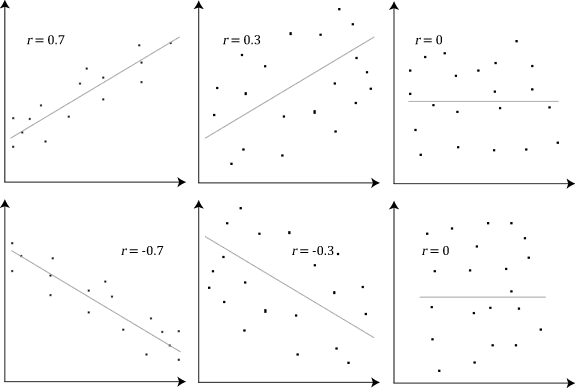

Atributos que tenha uma correlação próxima de zero podem não ser importantes para criar o modelo de aprendizagem de máquina. 

Vamos tentar filtrar os nossos dados pegando apenas aqueles atributos que tenha uma correlação acima de 0.2 ou abaixo de -0.2.

In [0]:
corabs = abs(cor) # coloca os valores de correlação em valores absolutos
corabs

In [0]:
# selecionar os atributos que tenha uma correlação acima de 0.3 ou abaixo de -0.3
atrIdx = np.where(corabs >= 0.3)
data2 = data.iloc[:,atrIdx[0]]
data2



In [0]:
# Pegar os nomes dos genes que passaram no filtro da correlação
feature_names2 = feature_names[corabs >= 0.3]
feature_names2

Vamos criar o nosso classificador utilizando os dados filtrados e ver se modificou a sua acurácia.

In [0]:
clf = svm.SVC(gamma="scale", C=10)
scores = cross_val_score(clf, data2, cls, cv=5)  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

## Extra (Heatmaps)

Em dados de expressão gênica, é comum realizarmos um heatmap indicando quais genes estão diferencialmente expressos entre amostras de características constrantes. O código a seguir mostra como podemos fazer isso: 

In [0]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
# Selecionando os genes que possuem uma correlação acima de 0.5
atrIdx = np.where(cor >= 0.5)
data3 = data.iloc[:,atrIdx[0]]
data3

In [0]:

# Selecionando os nomes dos genes que possuem a correlação acima de 0.5
feature_names3 = feature_names[cor >= 0.5]
feature_names3

In [0]:
# Transformando os dados de expressão utilizando o z-score
# para tornar os dados comparáveis.
data3z = data3.copy()
for col in data3.columns:
  data3z[col] = (data3[col] - data3[col].mean())/data3[col].std(ddof=0)

data3z

In [0]:
# Plotando o heatmap desses genes
heat_map = sb.heatmap(data3z, cmap="RdBu")
plt.show()

In [0]:
# Realizando o mesmo procedimento, mas para genes que possuem correlação abaixo de -0.5
atrIdx = np.where(cor <= -0.5)
data3 = data.iloc[:,atrIdx[0]]
feature_names3 = feature_names[cor <= -0.5]

data3z = data3.copy()
for col in data3.columns:
  data3z[col] = (data3[col] - data3[col].mean())/data3[col].std(ddof=0)

data3z
heat_map = sb.heatmap(data3z, cmap="RdBu")
plt.show()

feature_names3

## Método Wrapper

Neste método, utiliza-se a performance de um método supervisionado de aprendizagem de máquina (como acurácia) para avaliar se um determinado atributo merece ser incluído na análise ou não.

Alguns exemplos de métodos que utilizam a abordagem Wrapper seriam:

* *Forward Selection*: O procedimento inicia-se com um conjunto vazio (conjunto reduzido) de atributos. O atributo que melhor contribui na construção do modelo é adicionado ao conjunto reduzido. Nas iterações posteriores, o método novamente escolhe aquele atributo que melhor contribui na acurácia do modelo e o adiciona no conjunto reduzido.

* *Backward Elimination*: Contrário do forward selection, o procedimento inicia-se com um conjunto com todos os atributos. A cada iteração, o método retira do conjunto atributos que pior contribui na performance do modelo. Um outro nome para este método também é *Recursive Feature elimination*. 

* *Combinação do forward selection e backward elimination*: Os passos dos métodos forward selection e backward elimination podem ser combinados de forma que, em cada passo, verifica-se tanto a performance do modelo quando adiciona ou remove um atributo do conjunto.




Nesta prática utilizaremos a função RFECV (*recursive feature elimination and cross-validated selection*) em conjunto com a regressão logística para selecionarmos os atributos considerados importantes na análise.

In [0]:
# Carregando as bibliotecas necessárias 
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [0]:
# Configurando o modelo da regressão logística
model = LogisticRegression(solver="lbfgs", max_iter=1000)

# Configurando a função RFECV
rfe = RFECV(model,  # modelo utilizado para avaliar a importância de um atributo após sua remoção
            step=3, # número de atributos a ser removido a cada iteração
            cv=5)   # número de grupos no cross-validation


In [0]:
# Realiza o RFECV
fit = rfe.fit(data2, cls)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Neste procedimento foram selecionados _ _ _ _ _ atributos.

Vamos verificar a performance do nosso classificador utilizando apenas os atributos selecionados:

In [0]:
# Tabela contendo apenas os atributos selecionados 
data4 = data2.iloc[:,fit.support_]
data4

In [0]:
# Verificando a performance do classificador
clf = svm.SVC(gamma="scale", C=10)
scores = cross_val_score(clf, data4, cls, cv=5)  
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [0]:
# Obtendo os nomes dos genes selecionados
feature_names2[fit.support_]

## Referência dos dados
Shipp et al., <b>Diffuse Large B-Cell Lymphoma Outcome Prediction by Gene Expression Profiling and Supervised Machine Learning </b>, Nature Medicine January 2002 Volume 8 Number 1 pp 68 - 74. Published: 2001.12.31

https://scikit-learn.org/stable/modules/feature_selection.html

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://www.datacamp.com/community/tutorials/feature-selection-python

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

